# first train a model

In [30]:
import xgboost as xgb
import numpy as np
import sys

import xgboost_explainer as xgb_exp

def sigmoid(x):
    return 1/(1+np.exp(-x))

dtrain = xgb.DMatrix('./train.libsvm')
dtest = xgb.DMatrix('./test.libsvm')
lmda = 1.0

params = {"objective":"binary:logistic", 'silent': 1, 'eval_metric': 'auc', 'base_score':0.5, "lambda":lmda}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
best_iteration = 42
bst = xgb.train(params, dtrain, best_iteration, watchlist)


[0]	eval-auc:0.881745	train-auc:0.886794
[1]	eval-auc:0.887637	train-auc:0.898009
[2]	eval-auc:0.895209	train-auc:0.908018
[3]	eval-auc:0.897542	train-auc:0.913157
[4]	eval-auc:0.897553	train-auc:0.916913
[5]	eval-auc:0.901308	train-auc:0.920597
[6]	eval-auc:0.904203	train-auc:0.924696
[7]	eval-auc:0.90488	train-auc:0.926771
[8]	eval-auc:0.905824	train-auc:0.928893
[9]	eval-auc:0.90824	train-auc:0.930563
[10]	eval-auc:0.909653	train-auc:0.932033
[11]	eval-auc:0.910952	train-auc:0.933475
[12]	eval-auc:0.91125	train-auc:0.934853
[13]	eval-auc:0.912229	train-auc:0.936429
[14]	eval-auc:0.913077	train-auc:0.936603
[15]	eval-auc:0.913533	train-auc:0.937018
[16]	eval-auc:0.913971	train-auc:0.937963
[17]	eval-auc:0.916046	train-auc:0.93907
[18]	eval-auc:0.916191	train-auc:0.939861
[19]	eval-auc:0.916247	train-auc:0.940736
[20]	eval-auc:0.917188	train-auc:0.941288
[21]	eval-auc:0.917256	train-auc:0.942817
[22]	eval-auc:0.917674	train-auc:0.943014
[23]	eval-auc:0.917472	train-auc:0.943805
[24]	e

# apply xgboost explainer to an observation

In [31]:
feature_map = ["satisfaction_level","last_evaluation","number_project",
               "average_montly_hours","time_spend_company","Work_accident",
               "promotion_last_5years","sales","salary"]

In [32]:
tree_lst = xgb_exp.model2table(bst, lmda=lmda)
sample = dtest.slice([802])
print(bst.predict(sample))

leaf_lst = bst.predict(sample, pred_leaf=True)
dist = xgb_exp.logit_contribution(tree_lst, leaf_lst[0])
sum_logit = 0.0
for k in dist:
    sum_logit += dist[k]
    fn = feature_map[int(k[1:])] if k != "intercept" else k
    print(fn + ":", dist[k])
# print(sigmoid(sum_logit))

[ 0.00995645]
intercept: -1.4477233142227064
last_evaluation: -0.7779663104556692
average_montly_hours: -0.4159895659998113
time_spend_company: -0.25305760508286557
satisfaction_level: -0.6634059629069854
number_project: 0.02692557805173946
Work_accident: -1.2246923984381386
salary: 0.17029401462985444
sales: -0.023232836934958548
promotion_last_5years: 0.009318957559541447


# plot impact of variable value on logit-odds

In [33]:
leaf_lsts = bst.predict(dtest, pred_leaf=True)
satisfaction_level_logit = []
last_evaluation_logit = []
for i,leaf_lst in enumerate(leaf_lsts):
    dist = xgb_exp.logit_contribution(tree_lst, leaf_lst)
    sum_logit = 0.0
    satisfaction_level_logit.append(dist['f0'])
    last_evaluation_logit.append(dist['f1'])

In [34]:
fp = open('./test.libsvm')
satisfaction_level_value = []
last_evaluation_value = []
for line in fp.readlines():
    arr = line.split()
    p = arr[1].split(':')
    assert p[0]=='0'
    satisfaction_level_value.append(float(p[1]))
    p = arr[2].split(':')
    assert p[0]=='1'
    last_evaluation_value.append(float(p[1]))

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (12, 8)

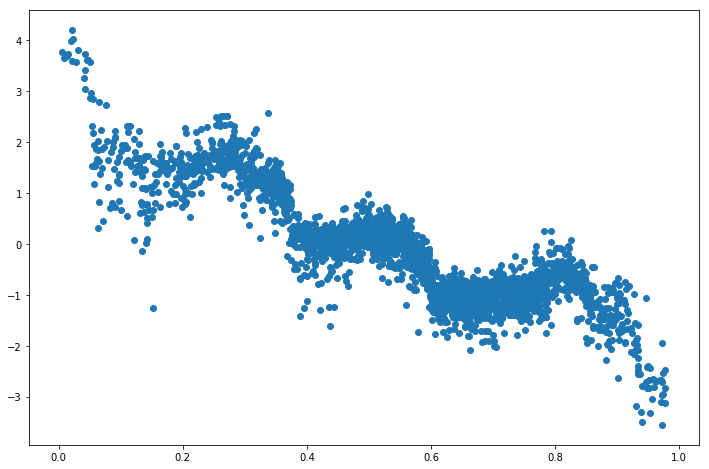

In [36]:
plt.scatter(satisfaction_level_value, satisfaction_level_logit)

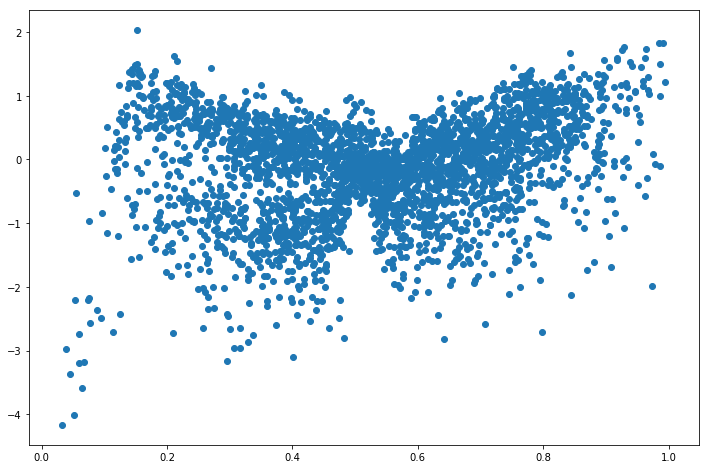

In [37]:
plt.scatter(last_evaluation_value, last_evaluation_logit)